<div class="alert alert-block alert-success">
     
# IC PCDA CAPSTONE - HARRY BAKHSHI - NOTEBOOK 8 - FEATURE ENGINEERING
     
</div>

MIT License for code used from https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python in notebook:   
https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python?tab=MIT-1-ov-file     

(Accessed 06/06/2024)

In [227]:
import numpy as np
import matplotlib.pyplot as plt
import os
import plotly.io as pio
import plotly.express as px
pio.templates.default = "plotly_white"
import pandas as pd
import pickle
import statistics
from src.utils.general import LogTime #prints Time Elapsed
#^see: https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/src/utils/general.py
#Accessed 17/06/2024

In [228]:
#!pip install window-ops

Load timeseries and seasonal period list:

In [229]:
#Import timeseries data and seasonal period list:
file = '/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/outlier_treated_ts_df_2.pik'
# with open(file, 'wb') as f:
#        pickle.dump(ts_df, f) #write df to .pik file on disk
with open(file, 'rb') as f:
     ts_df = pickle.load(f) #load pickle file 'file' into variable
file = '/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/janatahack_demand_forecasting_data_variable_seasonal_period_list_2.pik'
# with open(file, 'wb') as f:
#     pickle.dump(seasonal_period_list, f) #write df to .pik file on disk
with open(file, 'rb') as f:
     seasonal_period_list = pickle.load(f) #load pickle file 'file' into variable

In [230]:
152/8

19.0

In [231]:
55/3.75

14.666666666666666

In [232]:
(5.177*100*56*5)/(60*60*24)

1.6777314814814814

In [233]:
not_seasonal_count = 0
seasonal_count = 0
for var in range(len(seasonal_period_list)):
    if seasonal_period_list[var] == 'not seasonal':
        not_seasonal_count += 1
    if seasonal_period_list[var] != 'not seasonal':
        seasonal_count += 1
print('# seasonal variables out of 140: ', seasonal_count)
print('# not seasonal variables out of 140: ', not_seasonal_count)

# seasonal variables out of 140:  49
# not seasonal variables out of 140:  91


In [234]:
# file = '/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/feature_engineering_added_fourier.pik'
# # with open(file, 'wb') as f:
# #        pickle.dump(added_fourier, f) #write df to .pik file on disk
# with open(file, 'rb') as f:
#      added_fourier = pickle.load(f) #load pickle file 'file' into variable
# print(added_fourier)

In [235]:
col_list = list(ts_df.columns.values[:140])
print(col_list)

['679023median_total_price', '245338median_total_price', '222087median_total_price', '223153median_total_price', '223245median_total_price', '222765median_total_price', '547934median_total_price', '378934median_total_price', '219029median_total_price', '216418median_total_price', '219009median_total_price', '217390median_total_price', '216233median_total_price', '216425median_total_price', '320485median_total_price', '300021median_total_price', '245387median_total_price', '216419median_total_price', '398721median_total_price', '217217median_total_price', '217777median_total_price', '219844median_total_price', '600934median_total_price', '673209median_total_price', '327492median_total_price', '300291median_total_price', '546789median_total_price', '545621median_total_price', '679023median_base_price', '245338median_base_price', '222087median_base_price', '223153median_base_price', '223245median_base_price', '222765median_base_price', '547934median_base_price', '378934median_base_price',

# FEATURE ENGINEERING

- Use Direct/Independent Strategy for multi-step forecasting as straightforward training and forecasting regimes
  
^Modern Time Series Forecasting with Python (Manu Joseph, 2022)

- add interesting moving average and temporal features for data for modelling:

### Add Rolling Window features (seasonal and not seasonal):

In [236]:
#Add Rolling Window features:
from src.feature_engineering.autoregressive_features import add_rolling_features
from src.feature_engineering.autoregressive_features import (
    add_seasonal_rolling_features,
)
added_rolling = []
with LogTime():
    for var in range(len(col_list)):
        if seasonal_period_list[var] == 'not seasonal':           
            ts_df, added_features = add_rolling_features(
                ts_df,
                rolls=[13, 26, 52], #year = 52 timestamps periodicity of interest, sub-windows
                #half a year, quarter of a year
                column=col_list[var],
                agg_funcs=["mean", "std"],
                ts_id=col_list[var],
                use_32_bit=True,
                n_shift=19, #max no. of timestamps ahead to forecast using Direct Strategy
            )
            # print(f"Features Created: {','.join(added_features)}")
        else:
            ts_df, added_features = add_seasonal_rolling_features(
                ts_df,
                rolls=[3], #seasonality = periodicity of interest, rolling window feature
                #aggregation of values at timestamps -1x, -2x, -3x seasonal period
                seasonal_periods=[seasonal_period_list[var]],
                column=col_list[var],
                agg_funcs=["mean", "std"],
                ts_id=col_list[var],
                use_32_bit=True,
                n_shift=19,  #max no. of timestamps ahead to forecast using Direct Strategy
            )
            # print(f"Features Created: {','.join(added_features)}")
        added_rolling = added_rolling + added_features
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter06/01-Feature%20Engineering.ipynb
#Accessed 03/07/2024
print(len(list(ts_df.columns.values)))

Time Elapsed: 0 microseconds
793


### Add EWMA features:

In [237]:
#Add EWMA features:
from src.feature_engineering.autoregressive_features import add_ewma
added_ewma = []
with LogTime():
    for var in range(len(col_list)):
        if seasonal_period_list[var] == 'not seasonal':           
            pass
        else:
            ts_df, added_features = add_ewma(
                ts_df,
                spans=[seasonal_period_list[var]],
                column=col_list[var],
                ts_id=col_list[var],
                use_32_bit=True,
                n_shift=19,  #max no. of timestamps ahead to forecast using Direct Strategy
            )
           #print(f"Features Created: {','.join(added_features)}")
        added_ewma = added_ewma + added_features
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter06/01-Feature%20Engineering.ipynb
#Accessed 03/07/2024
print(len(list(ts_df.columns.values)))

Time Elapsed: 0 microseconds
842


## Add temporal features and Fourier terms

In [238]:
ts_df['timestamp'] = ts_df.index
first_column = ts_df.pop('timestamp') 
# insert column using insert(position,column_name, 
# first_column) function 
ts_df.insert(0, 'timestamp', first_column)
#^https://www.geeksforgeeks.org/how-to-move-a-column-to-first-position-in-pandas-dataframe/
#Accessed 24/06/2024

/tmp/ipykernel_1125/3885793246.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



### Add temporal features

In [239]:
#Add temporal features
from src.feature_engineering.temporal_features import add_temporal_features
with LogTime():
    ts_df, added_features = add_temporal_features(
        ts_df,
        field_name="timestamp",
        frequency='W-MON',
        add_elapsed=True,
        drop=False,
        use_32_bit=True,
    )
print(f"Features Created: {','.join(added_features)}")
added_temporal = added_features
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter06/01-Feature%20Engineering.ipynb
#Accessed 03/07/2024
print(len(list(ts_df.columns.values)))

Time Elapsed: 0 microseconds
Features Created: timestamp_Month,timestamp_Quarter,timestamp_Is_quarter_end,timestamp_Is_quarter_start,timestamp_Is_year_end,timestamp_Is_year_start,timestamp_Is_month_start,timestamp_Week,timestamp_Elapsed
852


/Users/harrybakhshi/Desktop/Python_notes/Modern-Time-Series-Forecasting-with-Python-main/src/feature_engineering/temporal_features.py:176: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/harrybakhshi/Desktop/Python_notes/Modern-Time-Series-Forecasting-with-Python-main/src/feature_engineering/temporal_features.py:176: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/harrybakhshi/Desktop/Python_notes/Modern-Time-Series-Forecasting-with-Python-main/src/feature_engineering/temporal_features.py:176: PerformanceWarning:

Data

In [240]:
temporal_features = list(added_features)

In [241]:
print(temporal_features)

['timestamp_Month', 'timestamp_Quarter', 'timestamp_Is_quarter_end', 'timestamp_Is_quarter_start', 'timestamp_Is_year_end', 'timestamp_Is_year_start', 'timestamp_Is_month_start', 'timestamp_Week', 'timestamp_Elapsed']


### Add Fourier terms:

In [242]:
#Add Fourier terms:
from src.feature_engineering.temporal_features import (
    add_fourier_features,
    bulk_add_fourier_features,
)
with LogTime():
    ts_df, added_features = bulk_add_fourier_features(
        ts_df,
        ['timestamp_Month', 'timestamp_Quarter', 'timestamp_Week'],
        n_fourier_terms=10,
        max_values=[12, 4, 52],
        use_32_bit=True,
    )
added_fourier = added_features
# print(f"Features Created: {','.join(added_features)}")
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter06/01-Feature%20Engineering.ipynb
#Accessed 03/07/2024
print(len(list(ts_df.columns.values)))

Time Elapsed: 0 microseconds
912


/Users/harrybakhshi/Desktop/Python_notes/Modern-Time-Series-Forecasting-with-Python-main/src/feature_engineering/temporal_features.py:272: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/harrybakhshi/Desktop/Python_notes/Modern-Time-Series-Forecasting-with-Python-main/src/feature_engineering/temporal_features.py:272: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/harrybakhshi/Desktop/Python_notes/Modern-Time-Series-Forecasting-with-Python-main/src/feature_engineering/temporal_features.py:272: PerformanceWarning:

Data

In [243]:
#Pickle engineered feature names as lists:
file = '/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/feature_engineering_added_temporal.pik'
with open(file, 'wb') as f:
       pickle.dump(added_temporal, f) #write df to .pik file on disk
# with open(file, 'rb') as f:
#      added_temporal = pickle.load(f) #load pickle file 'file' into variable
file = '/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/feature_engineering_added_fourier.pik'
with open(file, 'wb') as f:
       pickle.dump(added_fourier, f) #write df to .pik file on disk
# with open(file, 'rb') as f:
#      added_fourier = pickle.load(f) #load pickle file 'file' into variable

In [244]:
ts_df.columns.values[0:5]

array(['timestamp', '679023median_total_price',
       '245338median_total_price', '222087median_total_price',
       '223153median_total_price'], dtype=object)

Can plot Fourier terms:

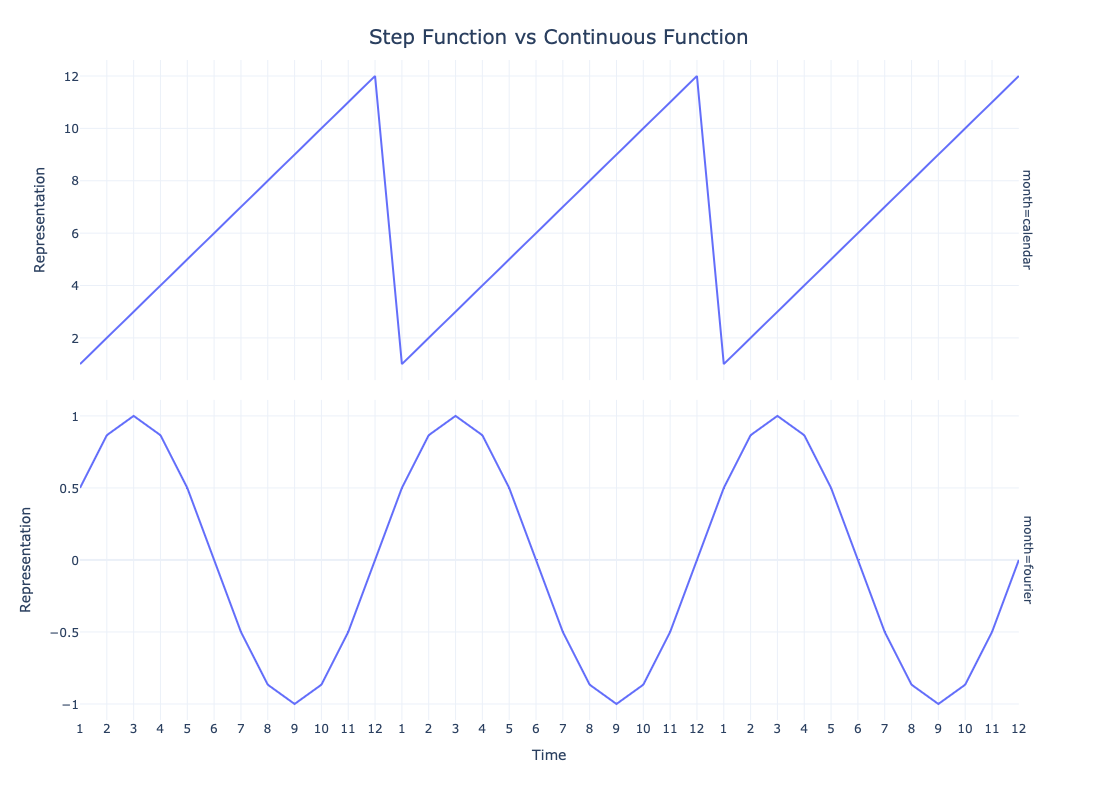

In [245]:
#Plot Fourier term "timestamp_Month_sin_1" to compare to temporal feature "timestamp_Month":
plot_df = (
    ts_df[["timestamp_Month", "timestamp_Month_sin_1"]]
    .drop_duplicates()
    .sort_values("timestamp_Month")
)

plot_df.columns = ["calendar", "fourier"]

plot_df = pd.concat([plot_df, plot_df, plot_df]).reset_index(drop=True)
# plot_df.reset_index(drop=True, inplace=True)

plot_df.reset_index(inplace=True)
plot_df["index"] += 1
plot_df = pd.melt(
    plot_df, id_vars="index", var_name="month", value_name="Representation"
)
fig = px.line(plot_df, x="index", y="Representation", facet_row="month")
fig.update_layout(
    autosize=False,
    width=900,
    height=800,
    title_text="Step Function vs Continuous Function",
    title={"x": 0.5, "xanchor": "center", "yanchor": "top"},
    titlefont={"size": 20},
    legend_title=None,
    # yaxis=dict(
    #     # title_text=ylabel,
    #     # titlefont=dict(size=12),
    # ),
    xaxis=dict(
        title_text="Time",
        # titlefont=dict(size=12),
    ),
)
fig.update_yaxes(matches=None)
fig.update_xaxes(
    ticktext=np.arange(1, 13).tolist() * 3,
    tickvals=np.arange(len(plot_df)) + 1,
)
fig.write_image('/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/timestamp_Month_timestamp_Month_sin_1_fourier_term_example.png')
fig.show()
#^https://github.com/PacktPublishing/Modern-Time-Series-Forecasting-with-Python/blob/main/notebooks/Chapter06/01-Feature%20Engineering.ipynb
#Accessed 03/07/2024

Pickle feature engineered df:

In [246]:
#Pickle feature engineered df:
file = '/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/outlier_treated_ts_df_feature_engineered_2.pik'
with open(file, 'wb') as f:
       pickle.dump(ts_df, f) #write df to .pik file on disk
# with open(file, 'rb') as f:
#      ts_df = pickle.load(f) #load pickle file 'file' into variable
file = '/Users/harrybakhshi/Desktop/Python_notes/data/PCDA_capstone/outlier_treated_ts_df_feature_engineered_3.pik'
with open(file, 'wb') as f:
       pickle.dump(ts_df, f) #write df to .pik file on disk
# with open(file, 'rb') as f:
#      ts_df = pickle.load(f) #load pickle file 'file' into variable